<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Общая-информация-о-датасете" data-toc-modified-id="Общая-информация-о-датасете-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Общая информация о датасете</a></span></li><li><span><a href="#Стиль-заголовков" data-toc-modified-id="Стиль-заголовков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Стиль заголовков</a></span></li><li><span><a href="#Замена-типов-данных" data-toc-modified-id="Замена-типов-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Замена типов данных</a></span></li><li><span><a href="#Устранение-дубликатов" data-toc-modified-id="Устранение-дубликатов-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Устранение дубликатов</a></span></li><li><span><a href="#Обработка-выбросов" data-toc-modified-id="Обработка-выбросов-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Обработка выбросов</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#One-hot-encoding" data-toc-modified-id="One-hot-encoding-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>One-hot-encoding</a></span></li><li><span><a href="#Обучающая-и-тестовая-выборки" data-toc-modified-id="Обучающая-и-тестовая-выборки-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Обучающая и тестовая выборки</a></span></li><li><span><a href="#Целевое-кодирование" data-toc-modified-id="Целевое-кодирование-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Целевое кодирование</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Градиентный-бустинг-(CatBoost)" data-toc-modified-id="Градиентный-бустинг-(CatBoost)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Градиентный бустинг (CatBoost)</a></span><ul class="toc-item"><li><span><a href="#Категориальные-признаки-закодированы." data-toc-modified-id="Категориальные-признаки-закодированы.-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Категориальные признаки закодированы.</a></span></li><li><span><a href="#Категориальные-признаки-не-закодированы." data-toc-modified-id="Категориальные-признаки-не-закодированы.-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Категориальные признаки не закодированы.</a></span></li></ul></li><li><span><a href="#Градиентный-бустинг-(LightGBM)" data-toc-modified-id="Градиентный-бустинг-(LightGBM)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Градиентный бустинг (LightGBM)</a></span><ul class="toc-item"><li><span><a href="#Категориальные-признаки-закодированы." data-toc-modified-id="Категориальные-признаки-закодированы.-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Категориальные признаки закодированы.</a></span></li><li><span><a href="#Категориальные-признаки-не-закодированы." data-toc-modified-id="Категориальные-признаки-не-закодированы.-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Категориальные признаки не закодированы.</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li></ul></div>

# Определение стоимости автомобилей

## Подготовка данных

### Общая информация о датасете

In [1]:
import pandas as pd

import re
import numpy as np
import time

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error

!pip install category_encoders
import category_encoders as ce

     |████████████████████████████████| 69 kB 1.2 MB/s eta 0:00:01


In [2]:
data = pd.read_csv('/datasets/autos.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [3]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


**Вывод**

В датасете более 350 тысяч строк, 16 колонок, есть пропуски. Целевой признак - `price`, следует отобрать из имеющихся признаки для обучения. Также стоит проанализировать данные на явные и неявные дубли и выбросы.

### Стиль заголовков

In [4]:
new_columns = []
for column in data.columns:
    new_column = re.sub(r'(?<!^)(?=[A-Z])', '_', column).lower()
    new_columns.append(new_column)

data.columns = new_columns 
data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        354369 non-null  object
 1   price               354369 non-null  int64 
 2   vehicle_type        316879 non-null  object
 3   registration_year   354369 non-null  int64 
 4   gearbox             334536 non-null  object
 5   power               354369 non-null  int64 
 6   model               334664 non-null  object
 7   kilometer           354369 non-null  int64 
 8   registration_month  354369 non-null  int64 
 9   fuel_type           321474 non-null  object
 10  brand               354369 non-null  object
 11  not_repaired        283215 non-null  object
 12  date_created        354369 non-null  object
 13  number_of_pictures  354369 non-null  int64 
 14  postal_code         354369 non-null  int64 
 15  last_seen           354369 non-null  object
dtypes:

**Вывод**

Привела названия колонок к `snake_case`.

### Замена типов данных

In [5]:
data['date_crawled'] = pd.to_datetime(data['date_crawled'], format='%Y-%m-%d %H:%M:%S')
data['date_created'] = pd.to_datetime(data['date_created'], format='%Y-%m-%d %H:%M:%S')
data['last_seen'] = pd.to_datetime(data['last_seen'], format='%Y-%m-%d %H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354369 non-null  datetime64[ns]
 1   price               354369 non-null  int64         
 2   vehicle_type        316879 non-null  object        
 3   registration_year   354369 non-null  int64         
 4   gearbox             334536 non-null  object        
 5   power               354369 non-null  int64         
 6   model               334664 non-null  object        
 7   kilometer           354369 non-null  int64         
 8   registration_month  354369 non-null  int64         
 9   fuel_type           321474 non-null  object        
 10  brand               354369 non-null  object        
 11  not_repaired        283215 non-null  object        
 12  date_created        354369 non-null  datetime64[ns]
 13  number_of_pictures  354369 no

### Устранение дубликатов

В датасете есть 4 явных дубликата - удалю их.

In [6]:
data.duplicated().sum()

4

In [7]:
data.loc[data.duplicated()]

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
171088,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08,0,89518,2016-03-09 09:46:57
231258,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28,0,66589,2016-03-28 08:46:21
258109,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03,0,75196,2016-04-07 09:44:54
325651,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18,0,36391,2016-03-18 18:46:15


In [8]:
data = data.drop_duplicates().reset_index(drop=True)

В марках неявных дублей нет.

In [9]:
data['brand'].sort_values().unique()

array(['alfa_romeo', 'audi', 'bmw', 'chevrolet', 'chrysler', 'citroen',
       'dacia', 'daewoo', 'daihatsu', 'fiat', 'ford', 'honda', 'hyundai',
       'jaguar', 'jeep', 'kia', 'lada', 'lancia', 'land_rover', 'mazda',
       'mercedes_benz', 'mini', 'mitsubishi', 'nissan', 'opel', 'peugeot',
       'porsche', 'renault', 'rover', 'saab', 'seat', 'skoda', 'smart',
       'sonstige_autos', 'subaru', 'suzuki', 'toyota', 'trabant',
       'volkswagen', 'volvo'], dtype=object)

В моделях на первый взгляд кажется, что есть неявные дубли в значениях `range_rover` и `rangerover`, но при более подробном анализе видно, что это модели разных марок.

In [10]:
data['model'].sort_values().unique()

array(['100', '145', '147', '156', '159', '1_reihe', '1er', '200',
       '2_reihe', '300c', '3_reihe', '3er', '4_reihe', '500', '5_reihe',
       '5er', '601', '6_reihe', '6er', '7er', '80', '850', '90', '900',
       '9000', '911', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a8',
       'a_klasse', 'accord', 'agila', 'alhambra', 'almera', 'altea',
       'amarok', 'antara', 'arosa', 'astra', 'auris', 'avensis', 'aveo',
       'aygo', 'b_klasse', 'b_max', 'beetle', 'berlingo', 'bora',
       'boxster', 'bravo', 'c1', 'c2', 'c3', 'c4', 'c5', 'c_klasse',
       'c_max', 'c_reihe', 'caddy', 'calibra', 'captiva', 'carisma',
       'carnival', 'cayenne', 'cc', 'ceed', 'charade', 'cherokee',
       'citigo', 'civic', 'cl', 'clio', 'clk', 'clubman', 'colt', 'combo',
       'cooper', 'cordoba', 'corolla', 'corsa', 'cr_reihe', 'croma',
       'crossfire', 'cuore', 'cx_reihe', 'defender', 'delta', 'discovery',
       'doblo', 'ducato', 'duster', 'e_klasse', 'elefantino', 'eos',
       'escort', 'espac

In [11]:
data[(~data['model'].isna()) & (data['model'].str.contains(r'range'))][['brand', 'model']].drop_duplicates()

,brand,model
5615,land_rover,range_rover
17863,land_rover,range_rover_sport
27949,rover,rangerover
31129,land_rover,range_rover_evoque


В типах коробок передач, кузовов и признаках ремонта неявных дублей нет.

In [12]:
data['gearbox'].value_counts()

manual    268249
auto       66283
Name: gearbox, dtype: int64

In [13]:
data['not_repaired'].value_counts()

no     247158
yes     36053
Name: not_repaired, dtype: int64

In [14]:
data['vehicle_type'].value_counts()

sedan          91457
small          79830
wagon          65165
bus            28775
convertible    20203
coupe          16161
suv            11996
other           3288
Name: vehicle_type, dtype: int64

В видах топлива значения `petrol` и `gasoline` это одно и то же - "бензин". Но при анализе цен по видам топлива видно, что для этих двух видов есть значительные различия. Поэтому значения не подменяю.

In [15]:
data['fuel_type'].value_counts()

petrol      216349
gasoline     98719
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: fuel_type, dtype: int64

In [16]:
data.pivot_table(index='fuel_type', values='price', aggfunc=['min', 'max', 'median', 'mean'])

,min,max,median,mean
,price,price,price,price
fuel_type,,,,
cng,0,16500,3650.0,4464.661947
electric,0,18900,5799.5,6657.711111
gasoline,0,20000,5200.0,6579.806542
hybrid,0,20000,9990.0,9465.356223
lpg,0,20000,2983.5,4040.089831
other,0,17500,974.5,2312.029412
petrol,0,20000,2000.0,3750.041775


In [17]:
data.duplicated().sum()

0

**Вывод**

Неявных дубликатов нет. Удалила 4 явных полных дубликата.

### Обработка выбросов

In [18]:
data.describe(datetime_is_numeric=True)

,date_crawled,price,registration_year,power,kilometer,registration_month,date_created,number_of_pictures,postal_code,last_seen
count,354365,354365.000000,354365.000000,354365.000000,354365.000000,354365.000000,354365,354365.0,354365.000000,354365
mean,2016-03-21 12:58:09.520460544,4416.679830,2004.234481,110.093816,128211.363989,5.714650,2016-03-20 19:12:06.583042560,0.0,50508.503800,2016-03-29 23:51:06.766184960
min,2016-03-05 14:06:22,0.000000,1000.000000,0.000000,5000.000000,0.000000,2014-03-10 00:00:00,0.0,1067.000000,2016-03-05 14:15:08
25%,2016-03-13 11:52:33,1050.000000,1999.000000,69.000000,125000.000000,3.000000,2016-03-13 00:00:00,0.0,30165.000000,2016-03-23 02:50:03
50%,2016-03-21 17:50:55,2700.000000,2003.000000,105.000000,150000.000000,6.000000,2016-03-21 00:00:00,0.0,49413.000000,2016-04-03 15:15:52
75%,2016-03-29 14:37:20,6400.000000,2008.000000,143.000000,150000.000000,9.000000,2016-03-29 00:00:00,0.0,71083.000000,2016-04-06 10:15:19
max,2016-04-07 14:36:58,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,2016-04-07 00:00:00,0.0,99998.000000,2016-04-07 14:58:51
std,NaN,4514.176349,90.228466,189.851330,37905.083858,3.726432,NaN,0.0,25783.100078,NaN


In [19]:
data.corr()

,price,registration_year,power,kilometer,registration_month,number_of_pictures,postal_code
price,1.000000,0.026916,0.158872,-0.333207,0.110580,NaN,0.076058
registration_year,0.026916,1.000000,-0.000828,-0.053448,-0.011619,NaN,-0.003459
power,0.158872,-0.000828,1.000000,0.024006,0.043379,NaN,0.021662
kilometer,-0.333207,-0.053448,0.024006,1.000000,0.009575,NaN,-0.007685
registration_month,0.110580,-0.011619,0.043379,0.009575,1.000000,NaN,0.013996
number_of_pictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postal_code,0.076058,-0.003459,0.021662,-0.007685,0.013996,NaN,1.000000


Из вывода описания видно, что:
* колонку `number_of_pictures` можно не использовать для обучения, т.к. в ней всегда 0;
* колонку `postal_code` тоже лучше не использовать, т.к. почтовый индекс не должен влиять на цену;
* колонка `last_seen` не должна участвовать в обучении, т.к. это информация о пользователе;
* колонка `date_crawled` - это дата сбора данных, но не их публикации, поэтому ее тоже не нужно использовать.

In [20]:
data.drop(['number_of_pictures', 'postal_code', 'last_seen', 'date_crawled'], axis=1, inplace=True)

In [21]:
data.duplicated().sum()

11830

В колонке `registration_year` видно некорректные значения 1000, 9999 - рассмотрю ее содержимое подробнее.

In [22]:
data['registration_year'].sort_values().unique()

array([1000, 1001, 1039, 1111, 1200, 1234, 1253, 1255, 1300, 1400, 1500,
       1600, 1602, 1688, 1800, 1910, 1915, 1919, 1920, 1923, 1925, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2066, 2200, 2222, 2290, 2500, 2800, 2900, 3000,
       3200, 3500, 3700, 3800, 4000, 4100, 4500, 4800, 5000, 5300, 5555,
       5600, 5900, 5911, 6000, 6500, 7000, 7100, 7500, 7800, 8000, 8200,
       8455, 8500, 8888, 9000, 9229, 9450, 9996, 99

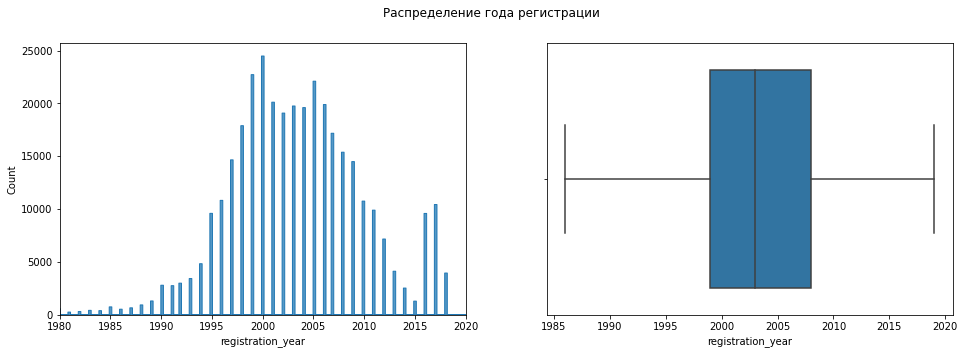

In [23]:
fig, axis = plt.subplots(1,2, figsize=(16, 5))
fig.suptitle(f'Распределение года регистрации')

g = sns.histplot(data = data,  x='registration_year', ax=axis[0], element="step"); 
g.set(xlim=(1980,2020))
sns.boxplot(data=data, x='registration_year', ax=axis[1], showfliers=False);

In [24]:
describe_data = data['registration_year'].describe()
iqr = (describe_data['75%'] - describe_data['25%'])
lower_line = round(max(describe_data['min'], describe_data['25%'] - round(1.5 * iqr)))
upper_line = round(min(describe_data['max'], describe_data['75%'] + round(1.5 * iqr)))
f'Диапазон "усов" диаграммы размаха для года регистрации {lower_line} - {upper_line}'

'Диапазон "усов" диаграммы размаха для года регистрации 1985 - 2022'

In [25]:
data.query('registration_year < @lower_line or registration_year > @upper_line')['registration_year'].count()

5553

За пределы "усов" диаграммы размаха для года регистрации попадает 5553 строки.

Также видно, что некоторые значения года и месяца регистрации ТС превышают максимальную дату скачивания данных - 7.04.2016, что также ставит под вопрос их корректность.

In [26]:
data.query('2016 < registration_year <= @upper_line or registration_year == 2016 and registration_month > 4')['registration_year'].count()

19115

Строки с некорректной датой регистрации (месяц и год) составляют около 7% данных, удаляю их, потому что год регистрации говорит о возможном возрасте машины (хотя и не является годом выпуска), что очень влияет на цену. По итогу видно, как выросла корреляция между годом и ценой.

Могу предположить, что некорректные значения появились по 3 причинам:
* год регистрации неизвестен, либо его не захотели указывать и вбили произвольное значение, например `1234`, `1111`;
* вместо года заполнили мощность;
* вместо года заполнили пробег.

Стоит заметить, что при такой "обрезке" из датасета уходят также машины, зарегистрированные до 1985 года, но обычно это раритетные автомобили, стоимость которых достаточно индивидуальна.

*Опытным путем проверила, что такой вариант отбора по году регистрации дает наименьшую RMSE из многих других вариантов расширения интервала (при прочих равных условиях).*

In [27]:
data = data.query('@lower_line <= registration_year <=2015 or registration_year == 2016 and registration_month <= 4')
data.describe(datetime_is_numeric=True)

,price,registration_year,power,kilometer,registration_month,date_created
count,329697.000000,329697.000000,329697.000000,329697.000000,329697.000000,329697
mean,4475.670094,2002.768290,111.891619,128549.092045,5.745400,2016-03-20 18:48:55.124068608
min,0.000000,1985.000000,0.000000,5000.000000,0.000000,2014-03-10 00:00:00
25%,1100.000000,1999.000000,71.000000,125000.000000,3.000000,2016-03-13 00:00:00
50%,2800.000000,2003.000000,105.000000,150000.000000,6.000000,2016-03-21 00:00:00
75%,6500.000000,2007.000000,143.000000,150000.000000,9.000000,2016-03-29 00:00:00
max,20000.000000,2016.000000,20000.000000,150000.000000,12.000000,2016-04-07 00:00:00
std,4539.034270,5.709849,182.605297,37391.032097,3.710958,NaN


In [28]:
data.corr()

,price,registration_year,power,kilometer,registration_month
price,1.000000,0.596534,0.167532,-0.343956,0.112886
registration_year,0.596534,1.000000,0.053665,-0.353037,0.039637
power,0.167532,0.053665,1.000000,0.022024,0.043689
kilometer,-0.343956,-0.353037,0.022024,1.000000,-0.000056
registration_month,0.112886,0.039637,0.043689,-0.000056,1.000000


In [29]:
data.duplicated().sum()

11378

В большом количестве строк в значениях `registration_month` есть 0, по-видимому, это случаи, когда анкетируемый затруднялся указать месяц регистрации. Месяц продажи не должен влиять на цену, поэтому удалю эту колонку тоже.

In [30]:
data['registration_month'].value_counts()

3     32668
0     32442
6     29177
4     27786
5     27034
7     25100
10    24434
12    22773
11    22713
9     22318
1     21952
8     21048
2     20252
Name: registration_month, dtype: int64

In [31]:
data.drop('registration_month', axis=1, inplace=True)

In [32]:
data.duplicated().sum()

12882

Рассмотрю подробно даты создания анкеты - видно, что большинство анкеты созданы в 2016 году. Не вижу, чтобы это могло повлять на цену, что подтверждает малая корреляция. Удаляю эти данные.

In [33]:
data['date_created'].dt.year.value_counts()

2016    329671
2015        25
2014         1
Name: date_created, dtype: int64

In [34]:
data['year_created'] = data['date_created'].dt.year
data['month_created'] = data['date_created'].dt.month
data.corr()

,price,registration_year,power,kilometer,year_created,month_created
price,1.000000,0.596534,0.167532,-0.343956,-0.005610,0.015029
registration_year,0.596534,1.000000,0.053665,-0.353037,-0.001317,0.002093
power,0.167532,0.053665,1.000000,0.022024,0.000147,0.003384
kilometer,-0.343956,-0.353037,0.022024,1.000000,0.004981,-0.002543
year_created,-0.005610,-0.001317,0.000147,0.004981,1.000000,-0.154275
month_created,0.015029,0.002093,0.003384,-0.002543,-0.154275,1.000000


In [35]:
data.drop(['year_created', 'month_created', 'date_created'], axis=1, inplace=True)

In [36]:
data.duplicated().sum()

43499

К колонке `kilometer` вопросов нет, видно, что по факту она является категориальной.

In [37]:
data['kilometer'].value_counts()

150000    222127
125000     34221
100000     13688
90000      10830
80000       9376
70000       8041
60000       7001
50000       5818
5000        5175
40000       4639
30000       4136
20000       3620
10000       1025
Name: kilometer, dtype: int64

В колонке `power` видно некорректные значения 0, 20000 - рассмотрю ее содержимое подробнее. Гугл говорит, что у самых мощных грузовиков она составляет 4000 л.с, а у легковых автомобилей - до 1600. Минимум - 10 л.с. у старых или эксклюзивных машин.

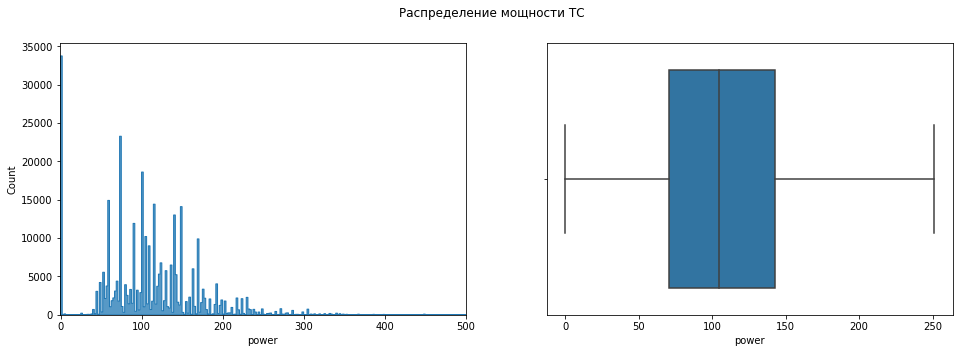

In [38]:
fig, axis = plt.subplots(1,2, figsize=(16, 5))
fig.suptitle(f'Распределение мощности ТС')

g = sns.histplot(data = data,  x='power', ax=axis[0], element="step"); 
g.set(xlim=(-1,500))
sns.boxplot(data=data, x='power', ax=axis[1], showfliers=False);

In [39]:
describe_data = data['power'].describe()
iqr = (describe_data['75%'] - describe_data['25%'])
lower_line = round(max(describe_data['min'], describe_data['25%'] - round(1.5 * iqr)))
upper_line = round(min(describe_data['max'], describe_data['75%'] + round(1.5 * iqr)))
f'Диапазон "усов" диаграммы размаха для мощности ТС {lower_line} - {upper_line}'

'Диапазон "усов" диаграммы размаха для мощности ТС 0 - 251'

In [40]:
data.query('power > @upper_line')['power'].count()

7034

За пределы "усов" диаграммы размаха для мощности попадает 7034 строки. 250 л.с. - мощность, начиная с которой возрастает ставка транспортного налога, понятно, что машин до 250 л.с. большинство, но есть и более мощные не эксклюзивные при этом.

Могу предположить, что некорректные значения появились по следующим причинам:
* вместо мощности заполнили год регистрации;
* вместо мощности заполнили пробег;
* мощность указали не в л.с.;
* опечатки.

Удалю строки, где значения меньше 10 или больше 1000. Опять же, как и в случае с годом регистрации, видно, как выросла корреляции мощности с ценой.

*Опытным путем проверила, что вариант с удаленим строк дает наименьшую RMSE в сравнении с вариантом, когда я заполняю такие значения модой по бренду, модели, мощности или бренду, модели, мощности, году регистрации (при прочих равных условиях).*

In [41]:
data.query('power < 10')['power'].count()

33922

In [42]:
data.query('power > 1000')['power'].count()

267

In [43]:
data.query('power < 10')['power'].value_counts()

0    33719
5      102
4       30
1       26
7       11
6       10
2        8
3        7
8        6
9        3
Name: power, dtype: int64

In [44]:
data = data.query('10 <= power <= 1000')

In [45]:
data.corr()

,price,registration_year,power,kilometer
price,1.000000,0.620444,0.493145,-0.384145
registration_year,0.620444,1.000000,0.147040,-0.399938
power,0.493145,0.147040,1.000000,0.094157
kilometer,-0.384145,-0.399938,0.094157,1.000000


In [46]:
data.duplicated().sum()

39628

Рассмотрю детальнее данные о цене.

<AxesSubplot:xlabel='price'>

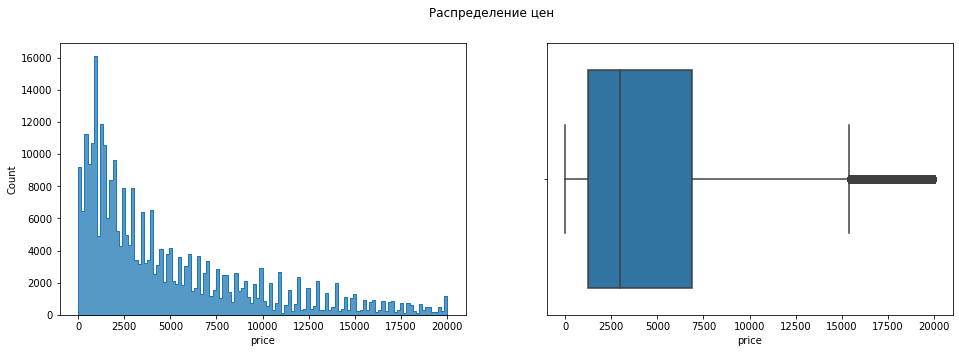

In [47]:
fig, axis = plt.subplots(1,2, figsize=(16, 5))
fig.suptitle(f'Распределение цен')

sns.histplot(data = data,  x='price', ax=axis[0], element="step"); 
sns.boxplot(data=data, x='price', ax=axis[1])

In [48]:
describe_data = data['price'].describe()
iqr = (describe_data['75%'] - describe_data['25%'])
lower_line = round(max(describe_data['min'], describe_data['25%'] - round(1.5 * iqr)))
upper_line = round(min(describe_data['max'], describe_data['75%'] + round(1.5 * iqr)))
f'Диапазон "усов" диаграммы размаха для цены {lower_line} - {upper_line}'

'Диапазон "усов" диаграммы размаха для цены 0 - 15375'

In [49]:
describe_data

count    295508.000000
mean       4751.918831
std        4610.908461
min           0.000000
25%        1250.000000
50%        3000.000000
75%        6900.000000
max       20000.000000
Name: price, dtype: float64

In [50]:
data.query('price<1100')['price'].value_counts()

0       6078
500     4356
1000    3533
600     2954
800     2944
        ... 
331        1
536        1
696        1
728        1
623        1
Name: price, Length: 482, dtype: int64

In [51]:
data.query('price<1100')['price'].count()

64155

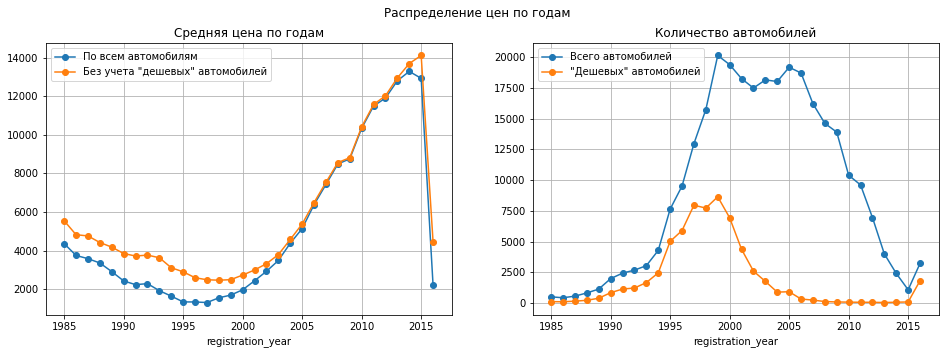

In [52]:
fig, axis = plt.subplots(1,2, figsize=(16, 5))
fig.suptitle(f'Распределение цен по годам')

data.pivot_table(index='registration_year', values='price', aggfunc='mean')\
    .plot(style='o-', grid= True, title = 'Средняя цена по годам', ax=axis[0]);
data.query('price>=1100').pivot_table(index='registration_year', values='price', aggfunc='mean')\
    .plot(style='o-', grid= True, title = 'Средняя цена по годам', ax=axis[0]);
axis[0].legend(['По всем автомобилям', 'Без учета "дешевых" автомобилей'], loc='upper left')

data.pivot_table(index='registration_year', values='price', aggfunc='count')\
    .plot(style='o-', grid= True, title = 'Количество автомобилей', ax=axis[1]);
data.query('price<1100').pivot_table(index='registration_year', values='price', aggfunc='count')\
    .plot(style='o-', grid= True, ax=axis[1]);

axis[1].legend(['Всего автомобилей', '"Дешевых" автомобилей'], loc='upper left');

В данных очень много нулевых и неправдоподобно низких цен. Обычно при подаче объявления ставят такую цену, чтобы обойти фильтры и привлечь покупателей.

Считаю, что строки с нулевой ценой необходимо удалить, т.к. это целевой признак, и не думаю, что его нужно заполнять на основе других данных.

Строки с ценами ниже 100 удалю - эти данные слишком неправдоподобны.

Цены от 100 до 200 умножу на 10 - как предположение, что это опечатки, в которых недопечатали 0.

*Опытным путем проверила, что такой вариант корректировки цен дает наименьшую RMSE из многих других вариантов (при прочих равных условиях).*

In [53]:
data.query('price==0')['price'].count()

6078

In [54]:
data = data.query('price != 0').reset_index(drop=True)
data.corr()

,price,registration_year,power,kilometer
price,1.000000,0.624692,0.503704,-0.390459
registration_year,0.624692,1.000000,0.146563,-0.406609
power,0.503704,0.146563,1.000000,0.097494
kilometer,-0.390459,-0.406609,0.097494,1.000000


In [55]:
data.duplicated().sum()

38696

In [56]:
data.query('price < 100')['price'].count()

1125

In [57]:
data = data.query('price >= 100').reset_index(drop=True)
data.loc[data['price'] <200, 'price'] = data['price'] * 10

In [58]:
data.corr()

,price,registration_year,power,kilometer
price,1.000000,0.624145,0.504041,-0.392293
registration_year,0.624145,1.000000,0.145808,-0.408049
power,0.504041,0.145808,1.000000,0.098952
kilometer,-0.392293,-0.408049,0.098952,1.000000


In [59]:
data.describe()

,price,registration_year,power,kilometer
count,288305.000000,288305.000000,288305.000000,288305.000000
mean,4882.088999,2003.022827,121.292204,128579.976067
std,4595.742570,5.602419,54.479730,36430.769252
min,200.000000,1985.000000,10.000000,5000.000000
25%,1400.000000,1999.000000,78.000000,125000.000000
50%,3200.000000,2003.000000,113.000000,150000.000000
75%,6999.000000,2007.000000,150.000000,150000.000000
max,20000.000000,2016.000000,1000.000000,150000.000000


In [60]:
data.duplicated().sum()

38714

**Вывод**

По результатам удалила колонки `date_crawled`, `number_of_pictures`, `date_created`, `postal_code`, `last_seen`, `registration_month`.

Удалила строки с данными о регистрации до 1985 и после апреля 2016.

Удалила строки с данными о мощности меньше 10 и больше 1000.

Удалила строки с нулевыми ценами, а цены ниже 200 умножила на 10.

В итоге появилось 38714 строк-дубликатов, но я их не удаляю, т.к. изначально они не были дубликатами, говорят об частоте определенных данных, и повторение повлияет на обучение.

### Обработка пропусков

In [61]:
data.isna().sum()

price                    0
vehicle_type          7376
registration_year        0
gearbox               4950
power                    0
model                 9948
kilometer                0
fuel_type            13625
brand                    0
not_repaired         40474
dtype: int64

Очевидно, что нет данных для подбора модели в случае пропуска. Причины пропусков здесь не ясны, вероятно пользователи не всегда указывали модель в объявлении. Я не вижу смысла в определении цены без указания модели автомобиля. Поэтому удалю такие строки.

*Опытным путем проверила, что вариант с удалением строк дает значительно меньшую RMSE в сравнении с вариантом, когда пропуски заполнены значением `unknown`.*

In [62]:
data.query('model.isna()').head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
0,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
61,350,small,1997,manual,54,NaN,150000,NaN,fiat,yes
105,1450,sedan,1992,manual,136,NaN,150000,NaN,audi,no
119,6799,small,2009,NaN,60,NaN,20000,petrol,volkswagen,no
124,1495,wagon,2001,NaN,64,NaN,150000,gasoline,volkswagen,NaN


In [63]:
data.dropna(subset = ['model'], inplace = True)

Для типа кузова и признака наличия ремонта заполню пропуски значением `unknown`, эти признаки не так критичны как модель, а по ремонту информация в очень большом количестве строк отсутствует.

In [64]:
data['vehicle_type'] = data['vehicle_type'].fillna('unknown')
data['not_repaired'] = data['not_repaired'].fillna('unknown')

Аналогичным образом заполню пропуски по виду топлива. Думаю, что здесь причина пропусков в том, что подающий объявление не считал нужным указывать эту информацию.

*Опытным путем проверила, что такой вариант заполнения дает наименьшую RMSE в сравнении с вариантом, когда пропуски заполнены модой в разрезе бренда, модели, мощности или бренда, модели, мощности, года регистрации.*

In [65]:
data['fuel_type'] = data['fuel_type'].fillna('unknown')

In [66]:
data.isna().sum()

price                   0
vehicle_type            0
registration_year       0
gearbox              4336
power                   0
model                   0
kilometer               0
fuel_type               0
brand                   0
not_repaired            0
dtype: int64

In [67]:
data.duplicated().sum()

38281

Определю однозначные соответствия типа коробки передач для сочетаний марки, модели, мощности и года регистрации и заполню ими пропуски в соответствии с этим сочетанием. Оставшиеся пропуски заполню значением `unknown`.

In [68]:
data['gearbox'] = data['gearbox'].fillna(data.groupby(['brand', 'model', 'registration_year', 'power'])['gearbox'].
                                     transform(lambda x: x.mode()[0] if x.nunique()==1 else 'unknown'))

In [69]:
data.isna().sum()

price                0
vehicle_type         0
registration_year    0
gearbox              0
power                0
model                0
kilometer            0
fuel_type            0
brand                0
not_repaired         0
dtype: int64

In [70]:
data.duplicated().sum()

38421

**Вывод**

Заполнила пропуски в данных следующим образом:
* строки с пропусками в `model` удалила.
* для колонок `vehicle_type`, `not_repaired`, `fuel_type` заполнила значением `unknown`.
* для колонки `gearbox` - однозначным значением для сочетания марки, модели, мощности двигателя, года регистрации, иначе - значением `unknown`.

###  One-hot-encoding

In [71]:
cat_data = data.copy()

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278357 entries, 1 to 288304
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              278357 non-null  int64 
 1   vehicle_type       278357 non-null  object
 2   registration_year  278357 non-null  int64 
 3   gearbox            278357 non-null  object
 4   power              278357 non-null  int64 
 5   model              278357 non-null  object
 6   kilometer          278357 non-null  int64 
 7   fuel_type          278357 non-null  object
 8   brand              278357 non-null  object
 9   not_repaired       278357 non-null  object
dtypes: int64(4), object(6)
memory usage: 23.4+ MB


In [73]:
data = pd.get_dummies(data, drop_first=True, columns = ['vehicle_type', 'gearbox', 'fuel_type', 'not_repaired'])

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278357 entries, 1 to 288304
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   price                     278357 non-null  int64 
 1   registration_year         278357 non-null  int64 
 2   power                     278357 non-null  int64 
 3   model                     278357 non-null  object
 4   kilometer                 278357 non-null  int64 
 5   brand                     278357 non-null  object
 6   vehicle_type_convertible  278357 non-null  uint8 
 7   vehicle_type_coupe        278357 non-null  uint8 
 8   vehicle_type_other        278357 non-null  uint8 
 9   vehicle_type_sedan        278357 non-null  uint8 
 10  vehicle_type_small        278357 non-null  uint8 
 11  vehicle_type_suv          278357 non-null  uint8 
 12  vehicle_type_unknown      278357 non-null  uint8 
 13  vehicle_type_wagon        278357 non-null  uint8 
 14  gear

В датасете очень большое для one-hot-encoding количество значений бренда и модели. Объединю их в одну колонку и использую целевое кодирование после разбиения на выборки.

In [75]:
data['model'].value_counts()

golf                  24039
other                 18653
3er                   17153
polo                  10440
corsa                  9867
                      ...  
samara                    5
i3                        5
kalina                    5
range_rover_evoque        2
rangerover                2
Name: model, Length: 247, dtype: int64

In [76]:
data['brand'].drop_duplicates().count()

39

In [77]:
data['brand'].value_counts()

volkswagen       60326
bmw              30721
opel             30466
mercedes_benz    25783
audi             24544
ford             19564
renault          13242
peugeot           8769
fiat              7142
seat              5624
skoda             4812
mazda             4469
smart             4309
citroen           4012
nissan            3869
toyota            3867
hyundai           2969
mini              2900
volvo             2681
mitsubishi        2356
honda             2237
kia               1993
suzuki            1843
alfa_romeo        1819
chevrolet         1299
chrysler          1087
dacia              780
subaru             609
daihatsu           584
porsche            535
jeep               529
saab               453
land_rover         429
jaguar             408
daewoo             374
lancia             344
rover              310
trabant            164
lada               135
Name: brand, dtype: int64

In [78]:
data['brand_model'] = data['brand'] + '_' + data['model']

In [79]:
data['brand_model'].value_counts()

volkswagen_golf                  24039
bmw_3er                          17153
volkswagen_polo                  10440
opel_corsa                        9867
opel_astra                        8916
                                 ...  
rover_discovery                      2
land_rover_range_rover_evoque        2
rover_rangerover                     2
rover_freelander                     1
rover_defender                       1
Name: brand_model, Length: 294, dtype: int64

In [80]:
data.drop(['brand', 'model'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278357 entries, 1 to 288304
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   price                     278357 non-null  int64 
 1   registration_year         278357 non-null  int64 
 2   power                     278357 non-null  int64 
 3   kilometer                 278357 non-null  int64 
 4   vehicle_type_convertible  278357 non-null  uint8 
 5   vehicle_type_coupe        278357 non-null  uint8 
 6   vehicle_type_other        278357 non-null  uint8 
 7   vehicle_type_sedan        278357 non-null  uint8 
 8   vehicle_type_small        278357 non-null  uint8 
 9   vehicle_type_suv          278357 non-null  uint8 
 10  vehicle_type_unknown      278357 non-null  uint8 
 11  vehicle_type_wagon        278357 non-null  uint8 
 12  gearbox_manual            278357 non-null  uint8 
 13  gearbox_unknown           278357 non-null  uint8 
 14  fuel

**Вывод**

Прямым кодированием преобразовала колонки с категориальными признаками при небольшом количестве значений - `vehicle_type`, `gearbox`, `fuel_type`, `not_repaired`. Остальные колонки закодирую после разделения выборок.

### Обучающая и тестовая выборки

In [81]:
def get_samples(data):
    features = data.drop('price', axis=1)
    target = data['price']
    features_train, features_test, target_train, target_test  = \
        train_test_split(features, target, test_size=0.2, random_state=12345)    
    print(features_train.shape, target_train.shape)
    print(features_test.shape, target_test.shape)
    return features_train, features_test, target_train, target_test

In [82]:
features_train, features_test, target_train, target_test = get_samples(data)

(222685, 23) (222685,)
(55672, 23) (55672,)


In [83]:
features_train_cat, features_test_cat, target_train_cat, target_test_cat = get_samples(cat_data)

(222685, 9) (222685,)
(55672, 9) (55672,)


**Вывод**

Выделила тестовую выборку в размере 20% датасета.

### Целевое кодирование

In [84]:
encoder = ce.TargetEncoder(cols = 'brand_model')
encoder.fit(features_train, target_train)
features_train = encoder.transform(features_train) 
features_train.head()

/opt/conda/lib/python3.9/site-packages/category_encoders/target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/opt/conda/lib/python3.9/site-packages/category_encoders/target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


,registration_year,power,kilometer,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_other,vehicle_type_sedan,vehicle_type_small,vehicle_type_suv,vehicle_type_unknown,...,fuel_type_electric,fuel_type_gasoline,fuel_type_hybrid,fuel_type_lpg,fuel_type_other,fuel_type_petrol,fuel_type_unknown,not_repaired_unknown,not_repaired_yes,brand_model
215855,2007,170,150000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6181.397638
257384,2002,119,150000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2830.759494
231336,2011,190,100000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,6816.938422
35656,2004,250,150000,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,13240.994286
209595,2006,54,70000,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,3251.126850


In [85]:
features_test = encoder.transform(features_test)
features_test.head()

,registration_year,power,kilometer,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_other,vehicle_type_sedan,vehicle_type_small,vehicle_type_suv,vehicle_type_unknown,...,fuel_type_electric,fuel_type_gasoline,fuel_type_hybrid,fuel_type_lpg,fuel_type_other,fuel_type_petrol,fuel_type_unknown,not_repaired_unknown,not_repaired_yes,brand_model
235670,1994,44,150000,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,2198.847212
120369,2001,102,150000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,6931.797477
218815,2011,184,150000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6735.859152
146690,2003,170,150000,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6587.954403
136825,2004,101,150000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3999.052147


**Вывод**

Закодировала колонку `brand_model` целевым кодированием отдельно для обучающей и тестовой выборки.

## Обучение моделей

In [86]:
metrics = pd.DataFrame(columns = ['model_type', 'depth', 'n_estimators', 'fit_time', 'rmse_valid', 'predict_time', 'rmse_test'])

In [87]:
cat_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']

In [88]:
MIN_DEPTH = 10
MAX_DEPTH = 20
MAX_DEPTH_TREE = 30
MAX_DEPTH_CATBOOST = 16
CV = 4 # тестовая выборка 20%, поэтому валдационная тоже при кросс-валидации пусть будет 20% датасета
MIN_EST = 100
MAX_EST = 200
N_ITER = 4    

In [89]:
def get_best_params(model, features_train, target_train, distributions=None, verbose=None, cat_features=None):
    
    if distributions==None:
        distributions = {'max_depth':range(MIN_DEPTH, MAX_DEPTH + 1, 5), 'n_estimators':range(MIN_EST,MAX_EST + 1, 10)}  
    
    grid = RandomizedSearchCV(model, distributions, cv = CV, scoring = 'neg_root_mean_squared_error', n_iter=N_ITER, n_jobs = -1, \
        random_state=12345)
    
    if verbose==None:
        grid.fit(features_train, target_train)
    elif not cat_features==None:
        grid.fit(features_train, target_train, verbose=verbose, cat_features=cat_features)
    else:
        grid.fit(features_train, target_train, verbose=verbose)
    
    return grid.best_estimator_, -grid.best_score_

In [90]:
def get_metrics(model_features, features_train, target_train, features_test, target_test, verbose=None, cat_features=None):
    
    model = model_features.get('model')
    
    fit_time_beg = time.time()
    if verbose==None:
        model.fit(features_train, target_train)
    elif not cat_features==None:
        model.fit(features_train, target_train, verbose=verbose, cat_features=cat_features)
    else:
        model.fit(features_train, target_train, verbose=verbose)
    fit_time_end = time.time()    
    
    predict_time_beg = time.time()
    predictions = model.predict(features_test)
    predict_time_end = time.time()  
        
    metrics.loc[len(metrics.index)] = [model_features.get('model_type'), 
                                       model_features.get('depth'), 
                                       model_features.get('n_estimators'),
                                       fit_time_end-fit_time_beg, 
                                       model_features.get('rmse'), 
                                       predict_time_end-predict_time_beg, 
                                       mean_squared_error(target_test, predictions)**0.5
                                      ] 

### Дерево решений

In [91]:
%%time
distributions = {'max_depth':range(1, MAX_DEPTH_TREE + 1, 5)} 
model = DecisionTreeRegressor(random_state=12345)
best_model, best_score = get_best_params(model, features_train, target_train, distributions)

CPU times: user 11.7 s, sys: 47 ms, total: 11.8 s
Wall time: 13.4 s


In [92]:
max_depth=best_model.max_depth

model = DecisionTreeRegressor(random_state=12345, max_depth=max_depth)

model_features = {'model':model, 
                  'model_type':'DecisionTreeRegressor', 
                  'depth':max_depth,
                  'rmse':best_score                         
                 }
    
get_metrics(model_features, features_train, target_train, features_test, target_test)

In [93]:
metrics

,model_type,depth,n_estimators,fit_time,rmse_valid,predict_time,rmse_test
0,DecisionTreeRegressor,16,None,1.007465,1743.83353,0.017936,1728.574431


### Случайный лес

In [94]:
%%time
model = RandomForestRegressor(random_state=12345)
best_model, best_score = get_best_params(model, features_train, target_train)

CPU times: user 19min 36s, sys: 8.09 s, total: 19min 44s
Wall time: 19min 45s


In [95]:
max_depth=best_model.max_depth
n_estimators=best_model.n_estimators

model = RandomForestRegressor(random_state=12345, max_depth=max_depth, n_estimators=n_estimators)

model_features = {'model':model, 
                  'model_type':'RandomForestRegressor', 
                  'depth':max_depth,
                  'n_estimators':n_estimators,
                  'rmse':best_score                         
                 }
    
get_metrics(model_features, features_train, target_train, features_test, target_test)

In [96]:
metrics

,model_type,depth,n_estimators,fit_time,rmse_valid,predict_time,rmse_test
0,DecisionTreeRegressor,16,None,1.007465,1743.833530,0.017936,1728.574431
1,RandomForestRegressor,20,180,134.355916,1502.172812,3.420033,1496.738955


### Градиентный бустинг (CatBoost)

#### Категориальные признаки закодированы.

In [97]:
%%time
distributions = {'depth':range(MIN_DEPTH, MAX_DEPTH_CATBOOST + 1, 1), 'iterations':range(MIN_EST,MAX_EST + 1, 10)} 
model = CatBoostRegressor(random_state=12345, learning_rate = 1, loss_function="RMSE")
best_model, best_score = get_best_params(model, features_train, target_train, distributions, False)

CPU times: user 12min 57s, sys: 7min 27s, total: 20min 24s
Wall time: 20min 38s


In [98]:
max_depth=best_model.get_all_params().get('depth')
n_estimators=best_model.get_all_params().get('iterations')

model = CatBoostRegressor(random_state=12345, learning_rate = 1, depth=max_depth, iterations=n_estimators)

model_features = {'model':model, 
                  'model_type':'CatBoostRegressor', 
                  'depth':max_depth,
                  'n_estimators':n_estimators,
                  'rmse':best_score                         
                 }
    
get_metrics(model_features, features_train, target_train, features_test, target_test, False)

In [99]:
metrics

,model_type,depth,n_estimators,fit_time,rmse_valid,predict_time,rmse_test
0,DecisionTreeRegressor,16,None,1.007465,1743.833530,0.017936,1728.574431
1,RandomForestRegressor,20,180,134.355916,1502.172812,3.420033,1496.738955
2,CatBoostRegressor,10,140,10.669423,1530.454223,0.046212,1532.379623


#### Категориальные признаки не закодированы.

In [100]:
%%time
model = CatBoostRegressor(random_state=12345, learning_rate = 1, loss_function="RMSE")
best_model, best_score = get_best_params(model, features_train_cat, target_train_cat, distributions, False, cat_features)

CPU times: user 20min 19s, sys: 3min 54s, total: 24min 13s
Wall time: 24min 36s


In [101]:
max_depth=best_model.get_all_params().get('depth')
n_estimators=best_model.get_all_params().get('iterations')

model = CatBoostRegressor(random_state=12345, learning_rate = 1, depth=max_depth, iterations=n_estimators)

model_features = {'model':model, 
                  'model_type':'CatBoostRegressor (categories)', 
                  'depth':max_depth,
                  'n_estimators':n_estimators,
                  'rmse':best_score,
                  'verbose': False,
                  'cat_features': cat_features
                 }
    
get_metrics(model_features, features_train_cat, target_train_cat, features_test_cat, target_test_cat, False, cat_features)

In [102]:
metrics

,model_type,depth,n_estimators,fit_time,rmse_valid,predict_time,rmse_test
0,DecisionTreeRegressor,16,None,1.007465,1743.833530,0.017936,1728.574431
1,RandomForestRegressor,20,180,134.355916,1502.172812,3.420033,1496.738955
2,CatBoostRegressor,10,140,10.669423,1530.454223,0.046212,1532.379623
3,CatBoostRegressor (categories),10,140,20.865357,1552.543850,0.102271,1546.430195


### Градиентный бустинг (LightGBM)

#### Категориальные признаки закодированы.

In [103]:
%%time
model = LGBMRegressor(random_state=12345, learning_rate = 1)
best_model, best_score = get_best_params(model, features_train, target_train)

CPU times: user 2min 12s, sys: 1.05 s, total: 2min 13s
Wall time: 2min 15s


In [104]:
max_depth=best_model.max_depth
n_estimators=best_model.n_estimators

model = LGBMRegressor(random_state=12345, learning_rate = 1, max_depth=max_depth, n_estimators=n_estimators)

model_features = {'model':model, 
                  'model_type':'LGBMRegressor', 
                  'depth':max_depth,
                  'n_estimators':n_estimators,
                  'rmse':best_score                         
                 }
    
get_metrics(model_features, features_train, target_train, features_test, target_test)

In [105]:
metrics

,model_type,depth,n_estimators,fit_time,rmse_valid,predict_time,rmse_test
0,DecisionTreeRegressor,16,None,1.007465,1743.833530,0.017936,1728.574431
1,RandomForestRegressor,20,180,134.355916,1502.172812,3.420033,1496.738955
2,CatBoostRegressor,10,140,10.669423,1530.454223,0.046212,1532.379623
3,CatBoostRegressor (categories),10,140,20.865357,1552.543850,0.102271,1546.430195
4,LGBMRegressor,20,180,12.000640,1567.207906,0.499268,1566.582248


#### Категориальные признаки не закодированы.

In [106]:
for column in cat_features:
    features_train_cat[column] = features_train_cat[column].astype('category')
    features_test_cat[column] = features_test_cat[column].astype('category')    
features_train_cat.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222685 entries, 215855 to 225419
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   vehicle_type       222685 non-null  category
 1   registration_year  222685 non-null  int64   
 2   gearbox            222685 non-null  category
 3   power              222685 non-null  int64   
 4   model              222685 non-null  category
 5   kilometer          222685 non-null  int64   
 6   fuel_type          222685 non-null  category
 7   brand              222685 non-null  category
 8   not_repaired       222685 non-null  category
dtypes: category(6), int64(3)
memory usage: 8.3 MB


In [107]:
%%time
model = LGBMRegressor(random_state=12345, learning_rate = 1)
best_model, best_score = get_best_params(model, features_train_cat, target_train_cat)

CPU times: user 1min 49s, sys: 51.7 ms, total: 1min 49s
Wall time: 1min 51s


In [108]:
max_depth=best_model.max_depth
n_estimators=best_model.n_estimators

model = LGBMRegressor(random_state=12345, learning_rate = 1, max_depth=max_depth, n_estimators=n_estimators)

model_features = {'model':model, 
                  'model_type':'LGBMRegressor (categories)', 
                  'depth':max_depth,
                  'n_estimators':n_estimators,
                  'rmse':best_score                         
                 }
    
get_metrics(model_features, features_train_cat, target_train_cat, features_test_cat, target_test_cat)

In [109]:
metrics

,model_type,depth,n_estimators,fit_time,rmse_valid,predict_time,rmse_test
0,DecisionTreeRegressor,16,None,1.007465,1743.833530,0.017936,1728.574431
1,RandomForestRegressor,20,180,134.355916,1502.172812,3.420033,1496.738955
2,CatBoostRegressor,10,140,10.669423,1530.454223,0.046212,1532.379623
3,CatBoostRegressor (categories),10,140,20.865357,1552.543850,0.102271,1546.430195
4,LGBMRegressor,20,180,12.000640,1567.207906,0.499268,1566.582248
5,LGBMRegressor (categories),20,180,6.987768,1571.015350,0.707365,1573.452013


## Анализ моделей

In [110]:
metrics.sort_values('fit_time')

,model_type,depth,n_estimators,fit_time,rmse_valid,predict_time,rmse_test
0,DecisionTreeRegressor,16,None,1.007465,1743.833530,0.017936,1728.574431
5,LGBMRegressor (categories),20,180,6.987768,1571.015350,0.707365,1573.452013
2,CatBoostRegressor,10,140,10.669423,1530.454223,0.046212,1532.379623
4,LGBMRegressor,20,180,12.000640,1567.207906,0.499268,1566.582248
3,CatBoostRegressor (categories),10,140,20.865357,1552.543850,0.102271,1546.430195
1,RandomForestRegressor,20,180,134.355916,1502.172812,3.420033,1496.738955


In [111]:
metrics.sort_values('predict_time')

,model_type,depth,n_estimators,fit_time,rmse_valid,predict_time,rmse_test
0,DecisionTreeRegressor,16,None,1.007465,1743.833530,0.017936,1728.574431
2,CatBoostRegressor,10,140,10.669423,1530.454223,0.046212,1532.379623
3,CatBoostRegressor (categories),10,140,20.865357,1552.543850,0.102271,1546.430195
4,LGBMRegressor,20,180,12.000640,1567.207906,0.499268,1566.582248
5,LGBMRegressor (categories),20,180,6.987768,1571.015350,0.707365,1573.452013
1,RandomForestRegressor,20,180,134.355916,1502.172812,3.420033,1496.738955


In [112]:
metrics.sort_values('rmse_valid')

,model_type,depth,n_estimators,fit_time,rmse_valid,predict_time,rmse_test
1,RandomForestRegressor,20,180,134.355916,1502.172812,3.420033,1496.738955
2,CatBoostRegressor,10,140,10.669423,1530.454223,0.046212,1532.379623
3,CatBoostRegressor (categories),10,140,20.865357,1552.543850,0.102271,1546.430195
4,LGBMRegressor,20,180,12.000640,1567.207906,0.499268,1566.582248
5,LGBMRegressor (categories),20,180,6.987768,1571.015350,0.707365,1573.452013
0,DecisionTreeRegressor,16,None,1.007465,1743.833530,0.017936,1728.574431


**Вывод**

Самый лучший результат при кросс-валидации (и в итоге на тестовой выборке) дает случайный лес с количеством деревьев 180 и максимальной глубиной 20. Но время обучения и предсказания у него очень долгое в сравнении с градиентным бустингом.

Быстрее всего обучается и предсказывает дерево решений, но оно не идет ни в какое сравнение в части точности предсказания.

Из моделей градиентного бустинга максимальную точность при кросс-валидации (и в итоге на тестовой выборке) дает CatBoostRegressor, когда ему дают уже предварительно закодированные категориальные признаки.

Наиболее быстро обучается GBMRegressor, также с предварительным кодированием, а предсказывает - аналогичная в части кодирования CatBoostRegressor.

Подводя итог, я бы предпочла использовать CatBoostRegressor без предварительного кодирования категориальных переменных и вкладывала бы ресурсы в подбор гиперпараметров, т.к. в итоге это дало бы лучший результат чем у случайного леса с точки зрения логики работы модели (при тестировании на разных гиперпараметрах лес начинал демонстрировать переобучение). CatBoostRegressor быстрее предсказывает, а больше времени на обучение оправдывается точностью.